**CSC 578 Neural Networks and Deep Learning**
<br> **Multivariate Temperature Forecasting Using RNN/LSTM** 
<br> Kaggle Project 
<br> Spring 2019
<br> Name : Chakradhar Thota
<br> ID : 1858475
<br> Section - 901(Loop)

**Kaggle Username : Chakri**
<br>Public Ranking : 2nd (Score - 0.50204)
<br>Private Ranking : 3rd (Score - 0.50748)

**Objective**

The Main objective of this project is to build a LSTM network model with less Mean Absolute Error to forecast the temperatures by utilizing the climate conditions of last 24 hours which was recorded for every hour from 2009 to 2014.

**Importing the required Packages**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt

In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

**Loading the Datasets**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving climate_hour_train.csv to climate_hour_train.csv


In [0]:
climate_test = pd.read_csv('climate_Xtest.csv',header=None)
sample_submission = pd.read_csv('sample_submission_2019spring.csv')

In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "climate_hour_train.csv" with length 5214717 bytes


In [0]:
climate_hour_train = pd.read_csv(io.StringIO(uploaded['climate_hour_train.csv'].decode('utf-8')))
for i in range(len(climate_hour_train)):
  climate_hour_train.iloc[i,0] = climate_hour_train.iloc[i,0].split(' ')[0]
climate_hour_train['Date Time'] = pd.to_datetime(climate_hour_train['Date Time'], format='%d.%m.%Y')
climate_hour_train = climate_hour_train.set_index('Date Time')

## Exploratory Data Analysis

In [7]:
print("Dimensions of the data:")
print("No.of Instances/Rows : {0}".format(climate_hour_train.shape[0]))
print("No.of Attributes/Columns : {0}".format(climate_hour_train.shape[1]))

Dimensions of the data:
No.of Instances/Rows : 52566
No.of Attributes/Columns : 14


In [8]:
climate_hour_train.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [9]:
climate_hour_train.dtypes

p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

The Dataset has the attributes which will explain the climate conditions like air temperature, atmospheric pressure and humidity were recorded for every hour from 2009 to 2014. All of the attributes are numerical and the Time stamp of every day is set as index of this data.

**Checking for Missing Values in Data**

In [10]:
climate_hour_train.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

Missing values are checked in this data as a part of Exploratory data analysis. From the above results we can see that there are no missing values in the data.

**Statistical Description of Data**

In [11]:
climate_hour_train.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000
mean,988.723002,9.172795,283.254265,4.779049,76.444300,13.357483,9.458133,3.899249,5.977212,9.568031,1216.718989,2.142170,3.539017,173.689628
std,8.190684,8.533081,8.605048,6.922701,16.430164,7.572008,4.201679,4.723265,2.666892,4.253017,40.439912,1.530832,2.313246,87.251111
min,918.500000,-22.760000,250.850000,-24.800000,13.060000,0.970000,0.810000,0.000000,0.510000,0.810000,1066.190000,0.000000,0.000000,0.000000
25%,983.750000,3.110000,277.242500,0.130000,65.810000,7.640000,6.170000,0.810000,3.890000,6.240000,1188.082500,1.010000,1.800000,120.800000
50%,989.140000,9.310000,283.430000,5.200000,79.700000,11.740000,8.850000,2.090000,5.595000,8.965000,1213.440000,1.790000,3.000000,197.100000
75%,994.070000,15.280000,289.370000,10.030000,89.800000,17.390000,12.320000,5.130000,7.780000,12.450000,1243.050000,2.880000,4.750000,233.800000
max,1012.740000,35.480000,309.690000,22.940000,100.000000,57.800000,28.040000,41.710000,17.940000,28.530000,1392.560000,12.580000,20.330000,360.000000


The above table will describe that there are a total of 52566 instances in the data and the statistical properties of all attributes/features like Mean, Standard Deviation , Minimum, Maximum and quartiles which will help in getting an overview of the distribution of the attributes. For example, rh(%) has minimum and maximum as 13 and 100 respectively. Since the 50% percentile value 79 is close to 100 the distribution will be right skewed.

The most important property we can notice is that the scale range for all attributes are distinct. So we need to feature scaling/ Normalization so that all of the attributes will be in the same range which will helps to train the Network Model efficiently.

Text(0.5, 1.0, 'Correlation of all attributes with others in the data')

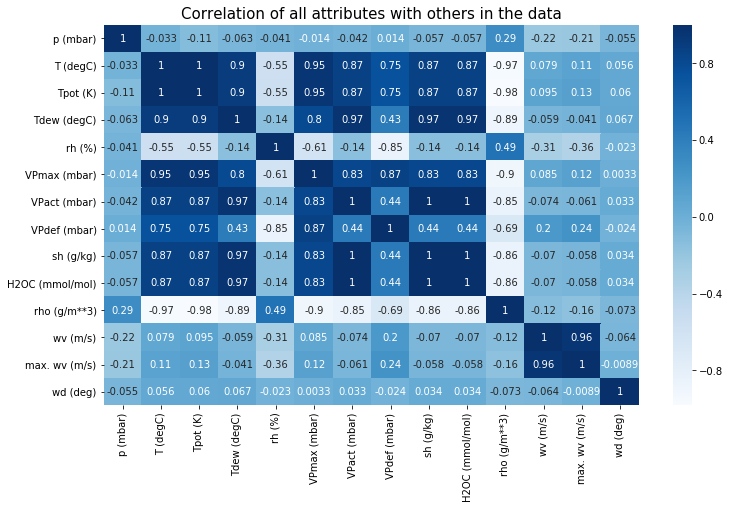

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(climate_hour_train.corr(),cmap="Blues",annot=True)
plt.title("Correlation of all attributes with others in the data",fontsize = 15)


<Figure size 720x360 with 0 Axes>

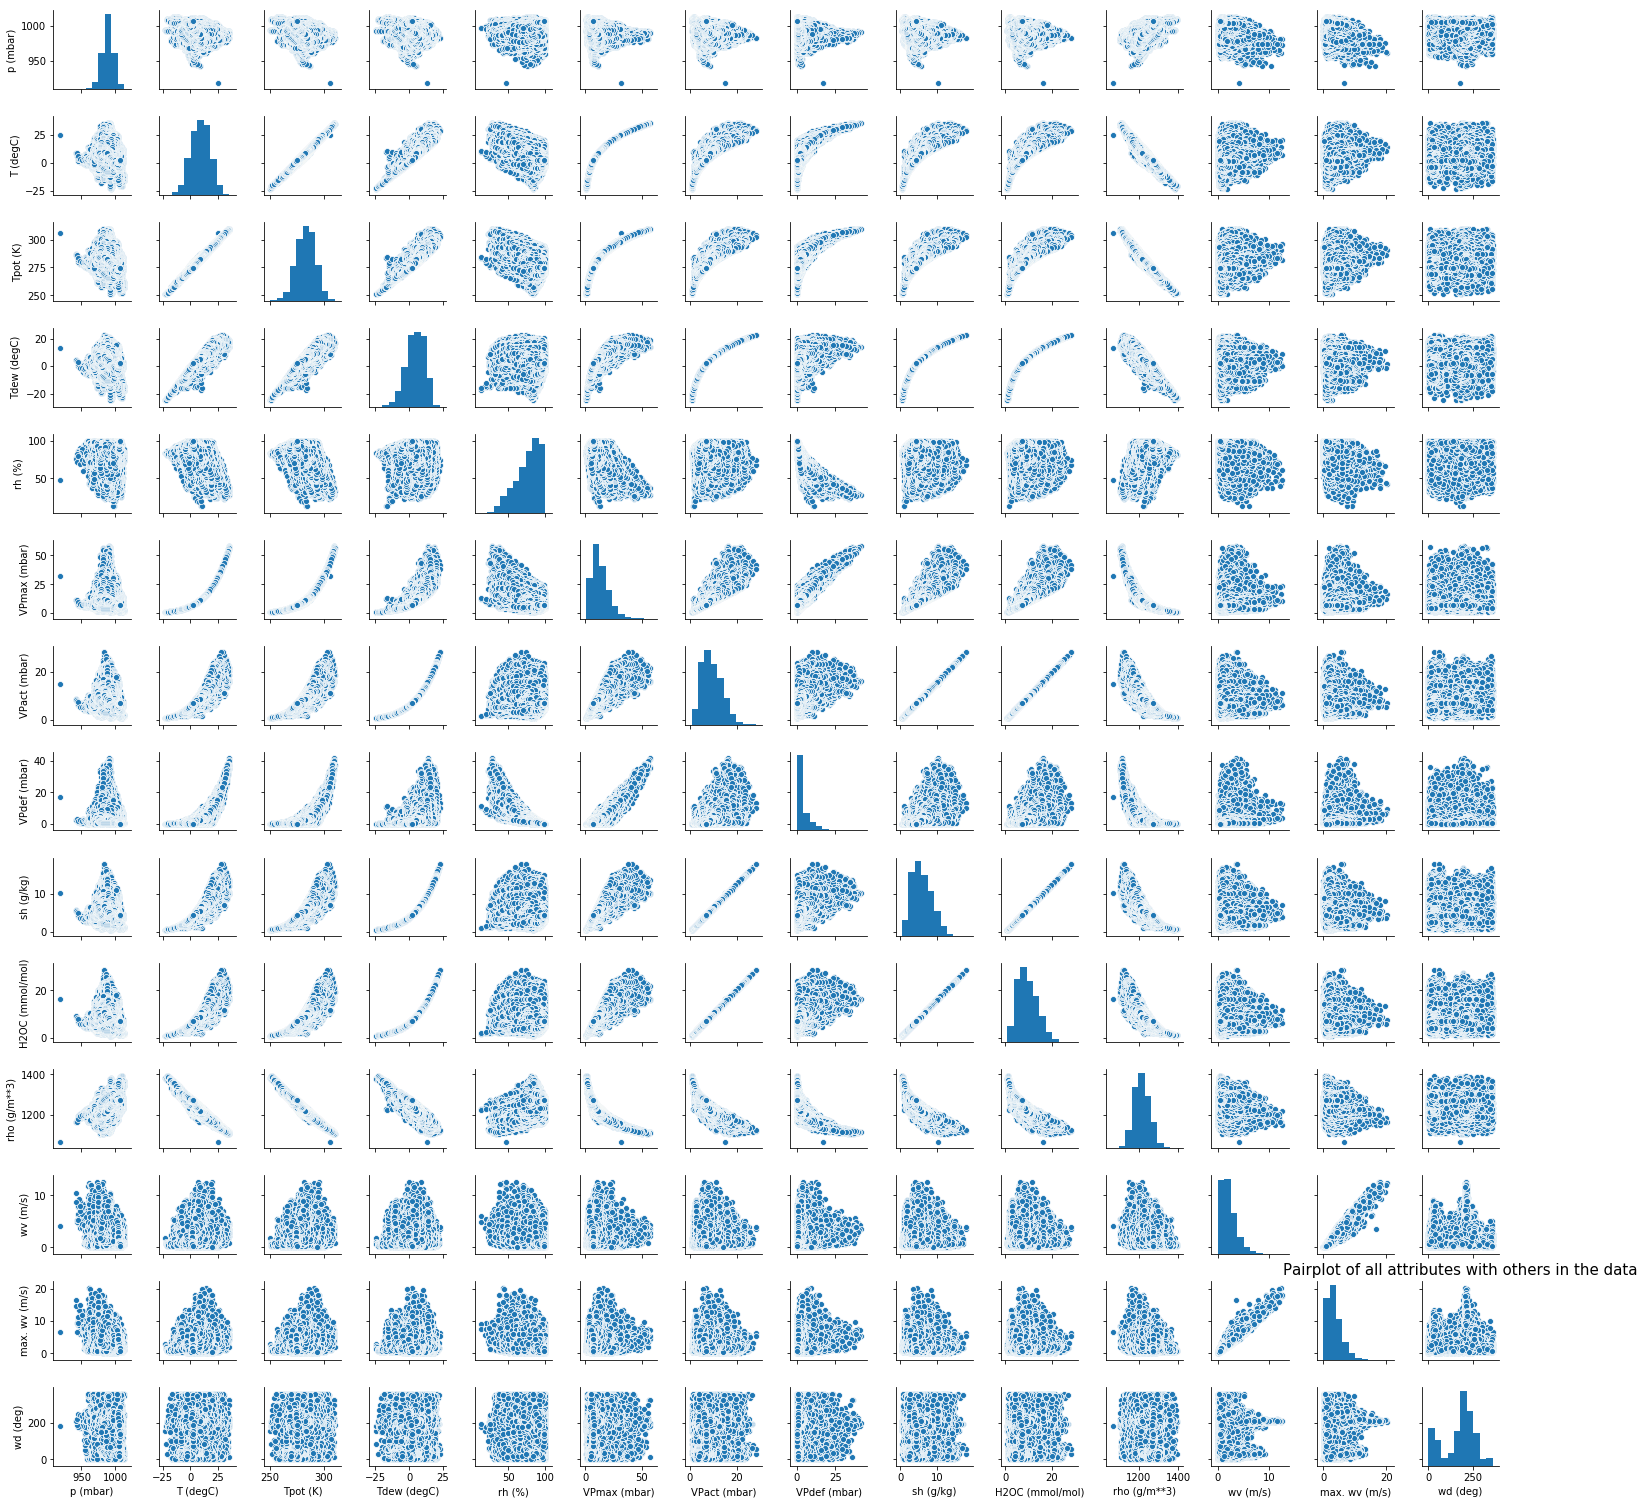

In [13]:
plt.figure(figsize=(10,5))
sns.pairplot(climate_hour_train,height=1.5)
plt.title("Pairplot of all attributes with others in the data",fontsize = 15)
plt.show()

The Correlation Matrix helps us to analyze which attributes are having more effect on the target attribute T(degC).

In this section the correlation between the attributes are plotted using heatmaps and scatter plots. The important points we can see from this matrix is that First, the attributes which describes the temperature Tpot, T deg and the Target attribute T(degC)  has normal distribution with bell shaped curve and also has very strong positive correlation between them which is equal to 1. Even though the attributes which will explain about the other climatic conditions like H20C, sh, Vpact has very strong correlations among themselves and also with target and they are light skewed to the right. Attributes such as rh, rho has negative correlation with target and w, wv, p doesn'tb have any effect on target due to very weak correlations.

Overall the correlation matrix has shown that most of the attributes are has shared strong correlations with others which leads to Multicollinearity in the data. This multi collinearity among independent attributes is an indicator for model overfitting.

**Analysis of Time Series properties in the Data**

In [0]:
data = climate_hour_train['T (degC)']

In [0]:
months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
years = ["2009","2010","2011","2012","2013","2014"]

mean_months_temp = []

for month in months:
  tot = 0
  num_obs = 0
  for year in years:
    tot += data[year+"-"+month].sum()
    num_obs += len(data[year+"-"+month])
  mean_months_temp.append(tot/num_obs)


mean_temp = []
year_month = []

for year in years:
  for month in months:
    year_month.append(year+"-"+month+"-"+"01")
    mean_temp.append(data[year+"-"+month].mean())

Text(0.5, 1.0, 'Mean Temperature of months in all years')

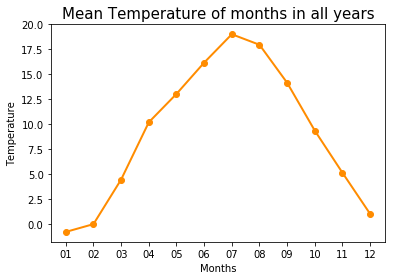

In [16]:
plt.plot(months,mean_months_temp,marker='.',linewidth=2, markersize=12,color='darkorange')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Mean Temperature of months in all years",fontsize=15)

Since the dataset has Tempearture readings for every hour in a year it is very hard to analyze the distribution of Temperature in every month for all years. So the Mean temperature is computed for every month over all years. The line graph has shown that the temperatures has normal distribution and will be less at start and end of years, will be high in the middle of the year.

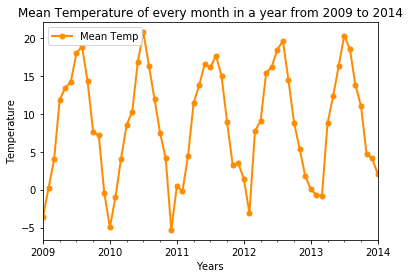

In [17]:
data_frame = pd.DataFrame({"Date Time":year_month,"Mean Temp":mean_temp})
data_frame['Date Time'] = pd.to_datetime(data_frame['Date Time'])
data_frame = data_frame.set_index("Date Time")

data_frame.plot(marker='.',linewidth = 2,markersize=10,color='darkorange')
plt.xlim('2009','2014')
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Mean Temperature of every month in a year from 2009 to 2014")
plt.legend(loc="upper left")

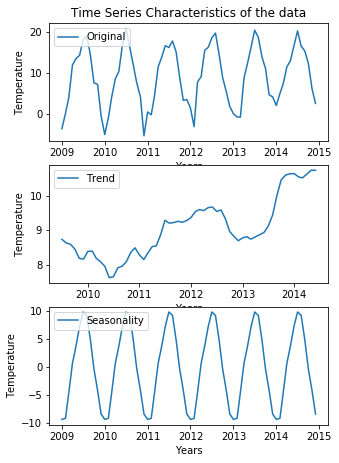

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_frame)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.title("Time Series Characteristics of the data")
plt.plot(data_frame, label='Original')
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.legend(loc="upper left")
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.legend(loc="upper left")
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.legend(loc="upper left")


As we are dealing with the Time series data, it is very important to check whether the data is stationary or not. This can be verified by analyzing time series graphs like Trend, Seasonality . From the above plots we can see that the there is a slight increasing trend in the temperatures which we can see in real world because of global warming. And also the Seasonility graph explains that there is a cycle or pattern exists in the data. so because of seasonility the temperatures will be high, low at respective same points in every cycle. Since the data set has slight increasing trend and seasonality we can say that there is weak stationarity in the data.

**Analysing the Latent Factors**

In [19]:
pip install factor-analyzer

     |████████████████████████████████| 51kB 3.9MB/s 


In [0]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [0]:
df = climate_hour_train.drop(["T (degC)"],axis=1)
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [22]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_norm)
print("P-Value for Bartlett test : {0}".format(p_value))

P-Value for Bartlett test : 0.0


Before you perform factor analysis, you need to evaluate the factorability of our dataset. Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. The P-value from the test which is 0.0 has shown that the data is statistically significant to perform Factor analysis.

In [23]:
kmo_all,kmo_model=calculate_kmo(df_norm)
print("Kaiser-Meyer-Olkin (KMO) value for the data : {0}".format(kmo_model))

Kaiser-Meyer-Olkin (KMO) value for the data : 0.7018781570834073


Kaiser-Meyer-Olkin (KMO) is another test which measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. The KMO test value 0.70 has further strengthen our case to perform Factor analysis.

In [24]:
factor_analyis = FactorAnalysis()
factor_analyis.fit(df_norm)
print(factor_analyis.components_)

[[-9.39809526e-02  9.60788058e-01  9.37441082e-01 -3.88347598e-01
   9.25208810e-01  9.39692047e-01  6.47289132e-01  9.40004836e-01
   9.40228250e-01 -9.44003045e-01  3.16170449e-02  5.74033394e-02
   4.40260181e-02]
 [-1.12035025e-01  1.52307700e-01 -2.15097875e-01 -7.29838946e-01
   2.20518754e-01 -2.40062088e-01  5.67087917e-01 -2.38294182e-01
  -2.38149128e-01 -1.40100687e-01  6.30672223e-01  6.58091986e-01
  -3.13573013e-02]
 [-3.27778835e-01 -4.54295865e-02  8.87203138e-02  2.99700972e-01
  -1.52121983e-01  7.33307049e-02 -3.09106895e-01  7.82941607e-02
   7.83504820e-02 -3.12769626e-02  5.61094194e-01  5.35820975e-01
   2.51463288e-03]
 [-4.35794042e-01  3.72831950e-02  4.88719341e-03 -4.75563245e-03
  -4.61446852e-02 -4.66551017e-02 -3.24704861e-02 -4.06702210e-02
  -4.03478786e-02 -1.19050525e-01 -9.46410830e-02 -8.15850078e-02
   2.06971926e-01]
 [-3.26708091e-02 -1.67159139e-03 -3.77133017e-03  5.74062262e-03
   2.12437905e-03 -5.07142259e-04  3.85686337e-03 -1.71672659e-05


Initial performance has shown that only 5 components have high covariance values with others. So 5 compnents are sufficient to obtain latent factors.

In [25]:
factor_analyis = FactorAnalysis(n_components=5)
factors = factor_analyis.fit_transform(df_norm)
pd.DataFrame(factor_analyis.components_,columns=df.columns)

,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,-0.065456,0.968660,0.897027,-0.476737,0.979969,0.919139,0.753362,0.919308,0.919395,-0.939470,0.047435,0.075567,0.021078
1,0.068740,0.033268,-0.373915,-0.750393,0.193252,-0.390179,0.656920,-0.391042,-0.390966,0.017296,0.263411,0.296247,-0.053681
2,-0.941815,0.124680,0.040559,-0.059639,-0.044726,-0.052270,-0.025199,-0.039147,-0.038587,-0.298148,0.261030,0.264679,0.098437
3,-0.322425,-0.211779,-0.185341,0.239372,0.017349,0.012935,0.016312,0.020603,0.019190,0.167931,-0.031757,-0.062000,-0.133671
4,0.000070,0.001578,-0.023213,-0.076302,-0.000314,-0.000568,0.000005,0.000175,-0.000011,0.000084,0.898756,0.894500,-0.054039


Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. Though the dataset has less attributes, factor analysis is performed to extract maximum common variance from all variables and puts them into a common score. The above table is a factor loading which is a matrix that shows the relationship of each variable to the underlying factor. And from the scores we can see that the Tpot, Tdew, VPmax, VPact, sh, H20C, rho has shared common variance and are the driving components for Factor 0. For Factor 1 rh, VPdef are the driving components, and p(mbar) is driving component for both Factor 2 and Factor 3. Finally wv and max.wv are the driving components for Factor 4. 

### Model Building for Kaggle Competition

**Data Pre - processing for Neural Network**

In [26]:
x_train = []
for i in range(24,len(climate_hour_train.iloc[:,:])):
  temp = climate_hour_train.iloc[i-24:i,:]
  temp_list = []
  for index,rows in temp.iterrows():
    for l in list(rows):
      temp_list.append(l)
  x_train.append(temp_list)
  
x_train = pd.DataFrame(x_train)

x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
0,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,...,268.66,-5.82,90.4,4.37,3.95,0.42,2.46,3.95,1294.72,0.33,0.63,175.7,999.77,-4.47,268.71,-5.84,90.1,4.38,3.95,0.43,2.46,3.95,1294.29,0.65,1.00,219.3,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.0
1,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,...,268.71,-5.84,90.1,4.38,3.95,0.43,2.46,3.95,1294.29,0.65,1.00,219.3,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.0,999.34,-4.44,268.77,-5.19,94.4,4.39,4.15,0.25,2.58,4.15,1293.47,0.28,1.00,148.1
2,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,...,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.0,999.34,-4.44,268.77,-5.19,94.4,4.39,4.15,0.25,2.58,4.15,1293.47,0.28,1.00,148.1,998.93,-4.29,268.95,-5.04,94.5,4.44,4.20,0.24,2.62,4.20,1292.22,0.49,0.88,209.8
3,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,...,268.77,-5.19,94.4,4.39,4.15,0.25,2.58,4.15,1293.47,0.28,1.00,148.1,998.93,-4.29,268.95,-5.04,94.5,4.44,4.20,0.24,2.62,4.20,1292.22,0.49,0.88,209.8,998.69,-4.45,268.81,-5.15,94.8,4.39,4.16,0.23,2.59,4.16,1292.69,0.65,1.00,203.3
4,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,...,268.95,-5.04,94.5,4.44,4.20,0.24,2.62,4.20,1292.22,0.49,0.88,209.8,998.69,-4.45,268.81,-5.15,94.8,4.39,4.16,0.23,2.59,4.16,1292.69,0.65,1.00,203.3,998.32,-4.58,268.71,-5.22,95.2,4.34,4.14,0.21,2.58,4.14,1292.83,0.77,1.38,190.2


**Normalizing the attributes**

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = pd.DataFrame(scaler.fit_transform(x_train))

x_train_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
0,0.951083,-2.018650,-2.077672,-1.958620,1.093353,-1.324593,-1.503880,-0.785569,-1.506515,-1.509242,2.254754,-1.262444,-1.257810,0.217823,0.965699,-2.116001,-2.175377,-2.101700,1.020324,-1.352347,-1.561032,-0.781339,-1.562792,-1.565704,2.363421,-1.236358,-1.257853,0.190303,0.992534,-2.107894,-2.169663,-2.085914,1.038596,-1.351049,-1.553932,-0.783460,-1.555332,-1.558690,2.361794,-1.282132,...,-1.697894,-1.532613,0.849822,-1.187655,-1.311852,-0.736904,-1.319769,-1.321882,1.931370,-1.184186,-1.257969,0.023118,1.349645,-1.600519,-1.692123,-1.535556,0.831546,-1.186349,-1.311882,-0.734785,-1.319799,-1.321912,1.920774,-0.975159,-1.098037,0.522768,1.327608,-1.608769,-1.699143,-1.480686,1.020199,-1.189005,-1.285726,-0.762304,-1.293575,-1.296072,1.921808,-1.131938,-1.149926,-0.214071
1,0.965744,-2.115914,-2.175291,-2.101608,1.020314,-1.352325,-1.560994,-0.781336,-1.562755,-1.565667,2.363330,-1.236315,-1.257810,0.190319,0.992577,-2.107798,-2.169567,-2.085812,1.038584,-1.351026,-1.553893,-0.783456,-1.555293,-1.558651,2.361690,-1.282083,-1.257853,-0.074414,1.010859,-2.136020,-2.198718,-2.137913,0.983816,-1.358973,-1.572971,-0.777109,-1.574079,-1.579850,2.397164,-1.334390,...,-1.692080,-1.535503,0.831563,-1.186334,-1.311852,-0.734787,-1.319769,-1.321882,1.920728,-0.975150,-1.098021,0.522761,1.327664,-1.608727,-1.699100,-1.480635,1.020220,-1.188990,-1.285696,-0.762306,-1.293545,-1.296042,1.921763,-1.131936,-1.149913,-0.214091,1.297079,-1.597044,-1.685188,-1.441663,1.093233,-1.185042,-1.264301,-0.772889,-1.274821,-1.274905,1.900523,-1.216859,-1.098050,-0.293143
2,0.992623,-2.107711,-2.169480,-2.085720,1.038574,-1.351005,-1.553855,-0.783452,-1.555256,-1.558614,2.361599,-1.282040,-1.257810,-0.074400,1.010903,-2.135923,-2.198621,-2.137809,0.983805,-1.358950,-1.572931,-0.777105,-1.574040,-1.579811,2.397059,-1.334340,-1.365921,0.759845,1.068279,-2.203992,-2.270775,-2.228912,0.959470,-1.376141,-1.606289,-0.777109,-1.607824,-1.612766,2.485712,-1.138422,...,-1.699057,-1.480584,1.020239,-1.188975,-1.285666,-0.762308,-1.293515,-1.296012,1.921718,-1.131927,-1.149896,-0.214097,1.297135,-1.597001,-1.685146,-1.441612,1.093255,-1.185028,-1.264271,-0.772891,-1.274792,-1.274875,1.900479,-1.216858,-1.098037,-0.293162,1.247013,-1.579455,-1.664257,-1.419983,1.099320,-1.178438,-1.252398,-0.775006,-1.259819,-1.263146,1.869587,-1.079679,-1.149926,0.413920
3,1.010950,-2.135835,-2.198533,-2.137716,0.983795,-1.358928,-1.572893,-0.777102,-1.574003,-1.579773,2.396967,-1.334297,-1.365877,0.759867,1.068324,-2.203893,-2.270675,-2.228804,0.959458,-1.376118,-1.606248,-0.777105,-1.607785,-1.612726,2.485604,-1.138375,-1.149784,-0.191302,1.098821,-2.208680,-2.277748,-2.224579,0.989903,-1.377461,-1.606289,-0.781343,-1.607824,-1.610415,2.498574,-1.367051,...,-1.685103,-1.441562,1.093275,-1.185013,-1.264241,-0.772893,-1.274763,-1.274846,1.900434,-1.216848,-1.098021,-0.293169,1.247067,-1.579413,-1.664215,-1.419933,1.099341,-1.178423,-1.252368,-0.775008,-1.259790,-1.263116,1.869543,-1.079677,-1.149913,0.413901,1.217706,-1.598216,-1.680537,-1.435881,1.117578,-1.185042,-1.261920,-0.777123,-1.271071,-1.272553,1.881219,-0.975160,-1.098050,0.339432
4,1.068372,-2.203803,-2.270585,-2.228708,0.959448,-1.376096,-1.606210,-0.777102,-1.607747,-1.612688,2.485509,-1.138334,-1.149743,-0.191289,1.098868,-2.208580,-2.277648,-2.224471,0.989891,-1.377438,-1.606248,-0.781339,-1.607785,-1.610375,2.498465,-1.367001,-1.314048,-0.317358,1.174567,-2.150084,-2.224287,-2.149469,1.002076,-1.362935,-1.577731,-0.779226,-1.581578,-1.584552,2.455784,-0.041002,...,-1.664172,-1.419883,1.099361,-1.178409,-1.252338,-0.775010,-1.259761,-1.263087,1.869499,-1.079668,-1.149896,0.413894,1.217758,-1.598174,-1.680495,-1.435831,1.117600,-1.185028,-1.26189

In [0]:
y_train = np.array([(climate_hour_train['T (degC)'][24:])]).T

**Splitting the Data for Validation set and Reshaping it to obtain LSTM suitable form**




In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_norm,y_train,train_size=0.8)

x_train_keras = np.array(x_train).reshape(x_train.shape[0],24,14)
x_valid_keras = np.array(x_valid).reshape(x_valid.shape[0],24,14)

In [36]:
print("Dimensions of the Data after reshaping it to Keras Acceptable form:")
print(x_train_keras.shape)

Dimensions of the Data after reshaping it to Keras Acceptable form:
(42033, 24, 14)


**Building LSTM Model**

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dense, Dropout, Activation, Flatten


data_dim = 14
timesteps = 24


model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True))  
#model.add(Dropout(0.4))
model.add(LSTM(64,return_sequences=True)) 
#model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24, 128)           73216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 64)            49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)      

In [31]:
import keras

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])

LSTM_hist = model.fit(x_train_keras, y_train, validation_data=(x_valid_keras, y_valid), shuffle=False, batch_size=150, epochs=50)

Instructions for updating:
Use tf.cast instead.
Train on 42033 samples, validate on 10509 samples
Epoch 1/50
42033/42033 [==============================] - 52s 1ms/step - loss: 22.4375 - mean_absolute_error: 3.2828 - val_loss: 5.5037 - val_mean_absolute_error: 1.7391
Epoch 2/50
42033/42033 [==============================] - 47s 1ms/step - loss: 3.5603 - mean_absolute_error: 1.3728 - val_loss: 1.8947 - val_mean_absolute_error: 1.0169
Epoch 3/50
42033/42033 [==============================] - 48s 1ms/step - loss: 1.4937 - mean_absolute_error: 0.8877 - val_loss: 1.0099 - val_mean_absolute_error: 0.7343
Epoch 4/50
42033/42033 [==============================] - 48s 1ms/step - loss: 1.0472 - mean_absolute_error: 0.7421 - val_loss: 0.6410 - val_mean_absolute_error: 0.5681
Epoch 5/50
42033/42033 [==============================] - 47s 1ms/step - loss: 0.8733 - mean_absolute_error: 0.6813 - val_loss: 0.6368 - val_mean_absolute_error: 0.5702
Epoch 6/50
42033/42033 [==============================] 

Text(0.5, 1.0, 'Loss Function of LSTM for every epoch')

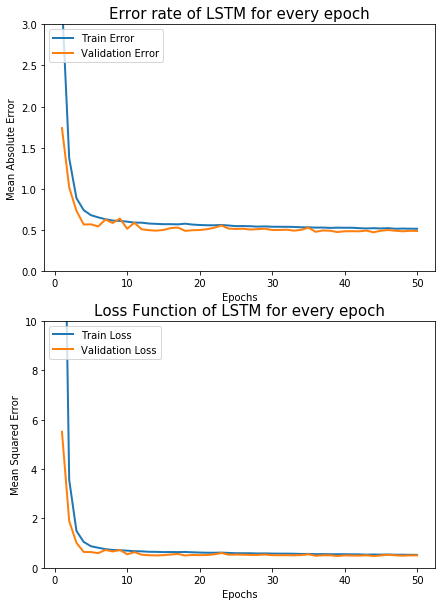

In [32]:
num_epochs = [i+1 for i in range(50)]
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 7
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(211)
plt.plot(num_epochs,LSTM_hist.history['mean_absolute_error'],linewidth = 2,markersize=10)
plt.plot(num_epochs,LSTM_hist.history['val_mean_absolute_error'],linewidth = 2,markersize=10)
plt.xlabel("Epochs")
plt.ylim(0,3)
plt.ylabel("Mean Absolute Error")
plt.legend(["Train Error", "Validation Error"],loc="upper left")
plt.title("Error rate of LSTM for every epoch",fontsize = 15)

plt.subplot(212)
plt.plot(num_epochs,LSTM_hist.history['loss'],linewidth = 2,markersize=10)
plt.plot(num_epochs,LSTM_hist.history['val_loss'],linewidth = 2,markersize=10)
plt.xlabel("Epochs")
plt.ylim(0,10)
plt.ylabel("Mean Squared Error")
plt.legend(["Train Loss", "Validation Loss"],loc="upper left")
plt.title("Loss Function of LSTM for every epoch",fontsize = 15)

The above plots has shown that there is no significant difference between the Error rates on Train and Test datasets. Hence we can sauy that the Model doesn't have overfitting at any epoch. But we can see that the Train and Test errors were effectively reduced upto 8 epochs and beyond that we can see that there is no significant improvement. Even after performing 50 epochs the Model doesn't have Overfitting and infact performed well on validation Data.

**Predictions on Test Dataset**

In [0]:
test_norm = scaler.transform(climate_test)
test_norm = test_norm.reshape(17447, 24, 14)

test_mean=10.25075
test_stdev=8.01432

pred = model.predict(test_norm)

In [0]:
sample_submission.temperature = pd.DataFrame(pred)

sample_submission = sample_submission.set_index('date time')
sample_submission.to_csv("LSTM_Predictions.csv", float_format="%1.2f")

Using the above LSTM Model the predictions were forecasted on the Test data. When the predictions were submitted to kaggle it computes the Mean Absolute error as 0.50204.